In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
df_train = pd.read_csv(r'C:\\python\\datamining\\data\\train-data.csv')
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,null bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# 1. 데이터 전처리 

In [3]:
# 결측치 확인 
print(df_train.isnull().sum())

## Mileage, Engine, Power, Seats 값 평균값으로 결측치 채우기.
## Seat값이 0인것이 있다 -> 오류  value을 평균으로 바꾸기
df_train["Seats"].fillna(value = df_train['Seats'].mode(), inplace=True)
df_train.Seats[df_train.Seats == 0.0] = 5.0
df_train.head()

## Mileage, Engine, Power 값 단위가 포함되어있어 제거
df_train['Mileage'] = df_train.Mileage.str.split(' ').str[0]
df_train['Engine'] = df_train.Engine.str.split(' ').str[0]
df_train['Power'] = df_train.Power.str.split(' ').str[0]
df_train=df_train.replace({'Power':'null'},{'Power':'0'})
df_train.head()

## Mileage, Engine, Power 값 float단위로 변환
df_train['Mileage'] = df_train['Mileage'].astype(float)
df_train['Engine'] = df_train['Engine'].astype(float)
df_train['Power'] = df_train['Power'].astype(float)
df_train['Year'] = df_train['Year'].astype(float)
df_train['Kilometers_Driven'] = df_train['Kilometers_Driven'].astype(float)

## Mileage, Engine, Power 값 결측치 or 0값 평균값으로 채운다
df_train=df_train.replace({'Mileage':0},{'Mileage':df_train['Mileage'].mode()})
df_train=df_train.replace({'Engine':0},{'Engine':df_train['Engine'].mode()})
df_train=df_train.replace({'Power':0},{'Power':df_train['Power'].mode()})
df_train['Mileage'].fillna(value = df_train['Mileage'].mode(), inplace = True)
df_train['Engine'].fillna(value = df_train['Engine'].mode(), inplace = True)
df_train['Power'].fillna(value = df_train['Power'].mode(), inplace = True)

## 이상한 칼럼 제거 (Unname:0 , New_price)
df_train.drop(columns=['New_Price','Unnamed: 0'], inplace=True)
df_train.dropna("index",inplace=True)

## 확인
print(df_train.isnull().sum())


Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [4]:
## data shape , type
print(df_train.shape)
print(df_train.info())
df_train

(5975, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   float64
 3   Kilometers_Driven  5975 non-null   float64
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(7), object(5)
memory usage: 606.8+ KB
None


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,74.00,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014.0,27365.0,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015.0,100000.0,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012.0,55000.0,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013.0,46000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [5]:
## 고유한 값을 가지는 name확인 
print("train data 의 name 갯수-> ",len(np.unique(list(df_train.Name))))

## name중 브랜드 이름만 
df_train['brand_name'] = df_train['Name'].apply(lambda x: str(x).split(" ")[0])
df_train.drop(columns=["Name"], axis=1, inplace=True)
df_train=df_train[['brand_name','Location','Year'	,'Kilometers_Driven'	,'Fuel_Type'	,'Transmission'	,'Owner_Type'	,'Mileage'	,'Engine'	,'Power'	,'Seats'	,'Price']]
print("train data 의 브랜드 갯수-> ",len(np.unique(list(df_train.brand_name))))

df_train=df_train.reset_index(drop=True)
print(df_train.dtypes)


train data 의 name 갯수->  1855
train data 의 브랜드 갯수->  31
brand_name            object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object


In [6]:
## 중복??되는 컬럼의 이름들 -> brand_name lsuzu -> ISUZU  
print("브랜드이름들 \n",np.unique(list(df_train.brand_name)))
df_train.brand_name[df_train.brand_name == 'Isuzu'] = 'ISUZU'
print("Location이름들 \n",np.unique(list(df_train.Location)))
print("Fuel_Type이름들 \n",np.unique(list(df_train.Fuel_Type)))
print("Transmission이름들 \n",np.unique(list(df_train.Transmission)))
print("Owner_Type이름들 \n",np.unique(list(df_train.Owner_Type)))
## 

브랜드이름들 
 ['Ambassador' 'Audi' 'BMW' 'Bentley' 'Chevrolet' 'Datsun' 'Fiat' 'Force'
 'Ford' 'Honda' 'Hyundai' 'ISUZU' 'Isuzu' 'Jaguar' 'Jeep' 'Lamborghini'
 'Land' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mini' 'Mitsubishi' 'Nissan'
 'Porsche' 'Renault' 'Skoda' 'Smart' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']
Location이름들 
 ['Ahmedabad' 'Bangalore' 'Chennai' 'Coimbatore' 'Delhi' 'Hyderabad'
 'Jaipur' 'Kochi' 'Kolkata' 'Mumbai' 'Pune']
Fuel_Type이름들 
 ['CNG' 'Diesel' 'LPG' 'Petrol']
Transmission이름들 
 ['Automatic' 'Manual']
Owner_Type이름들 
 ['First' 'Fourth & Above' 'Second' 'Third']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## 데이터 점검

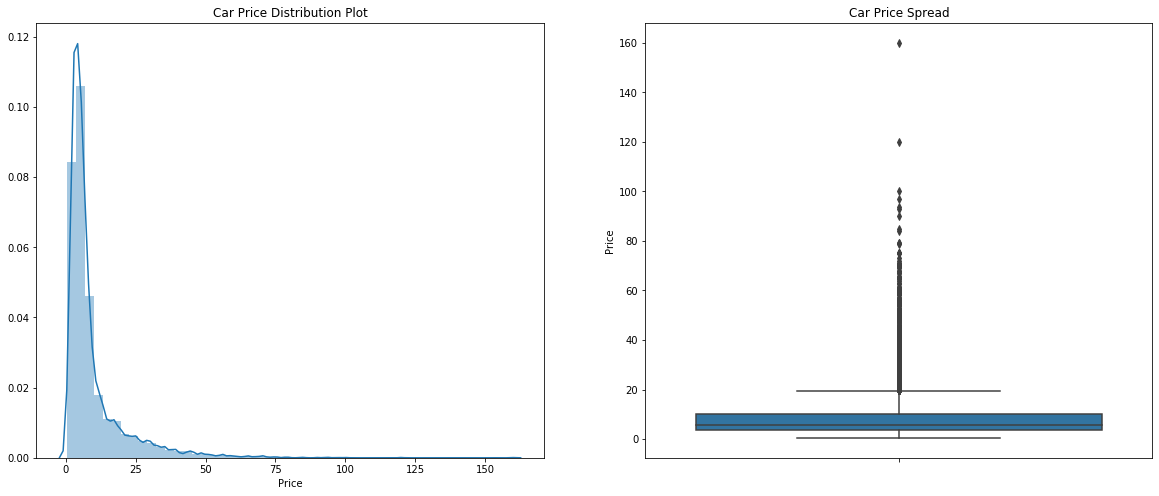

In [7]:
## 자동차 가격 분포
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df_train.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df_train.Price)

plt.show()

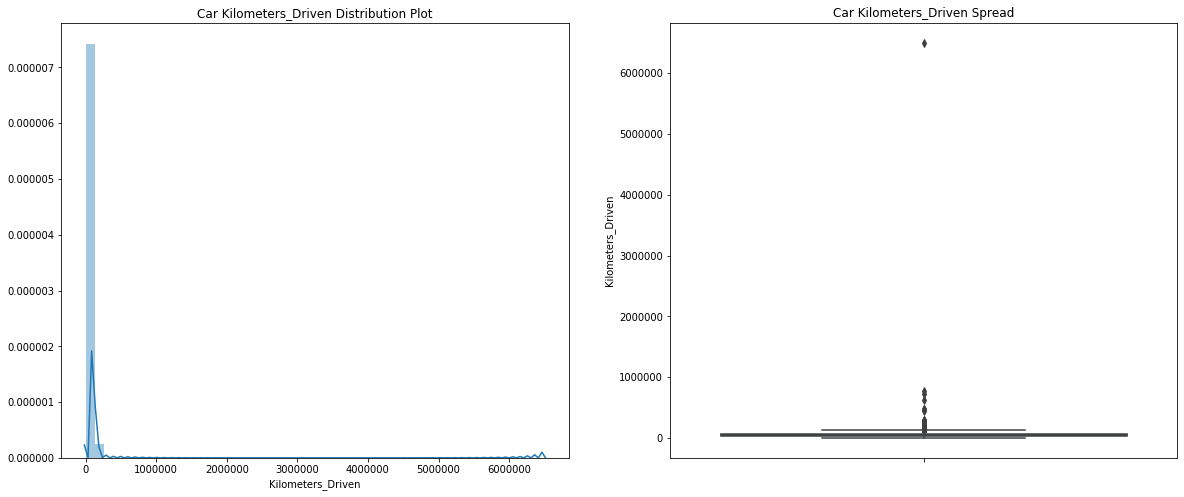

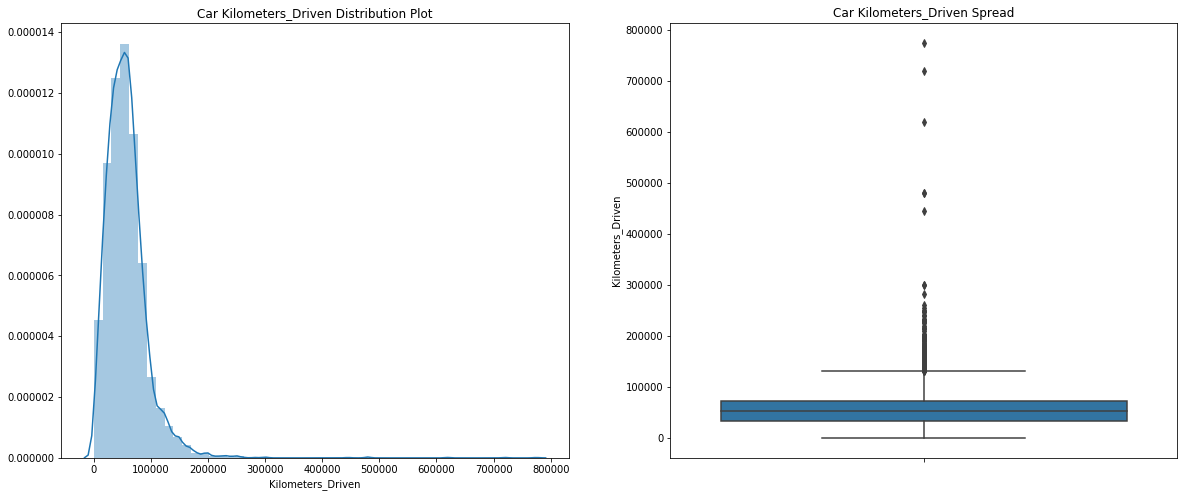

In [8]:
## 자동차 Kilometers_Driven 분포
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Kilometers_Driven Distribution Plot')
sns.distplot(df_train.Kilometers_Driven)

plt.subplot(1,2,2)
plt.title('Car Kilometers_Driven Spread')
sns.boxplot(y=df_train.Kilometers_Driven)

plt.show()

## 이상치 삭제 -> kilometer 6000000 이상인거
idx=[]
it=list(df_train['Kilometers_Driven'])
for i in range(len(it)):
    if(it[i]>1000000):
        idx.append(i)
df_train=df_train.drop(idx)
df_train=df_train.reset_index(drop=True)

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Kilometers_Driven Distribution Plot')
sns.distplot(df_train.Kilometers_Driven)

plt.subplot(1,2,2)
plt.title('Car Kilometers_Driven Spread')
sns.boxplot(y=df_train.Kilometers_Driven)

plt.show()

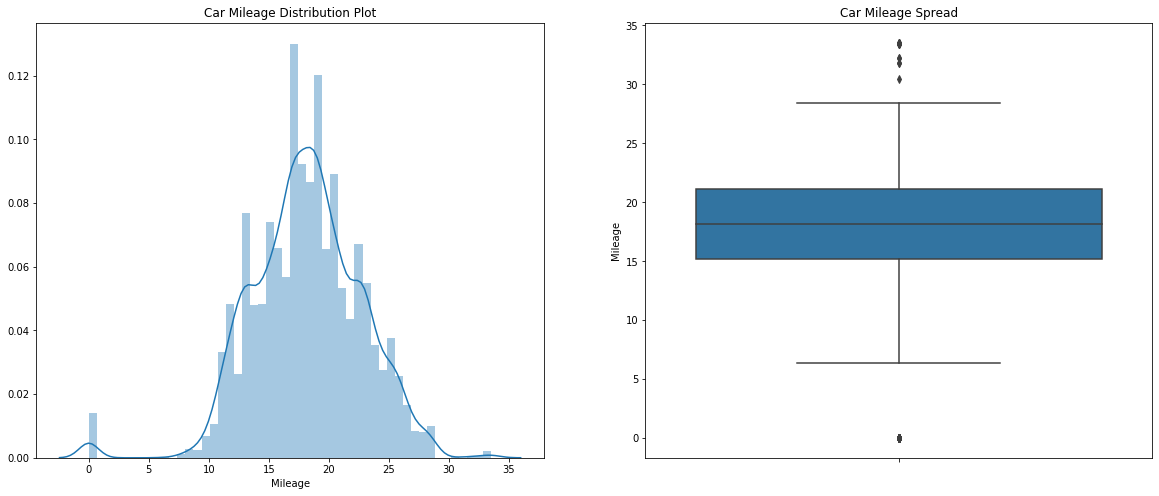

In [9]:
## 자동차 Mileage 분포
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Mileage Distribution Plot')
sns.distplot(df_train.Mileage)

plt.subplot(1,2,2)
plt.title('Car Mileage Spread')
sns.boxplot(y=df_train.Mileage)

plt.show()

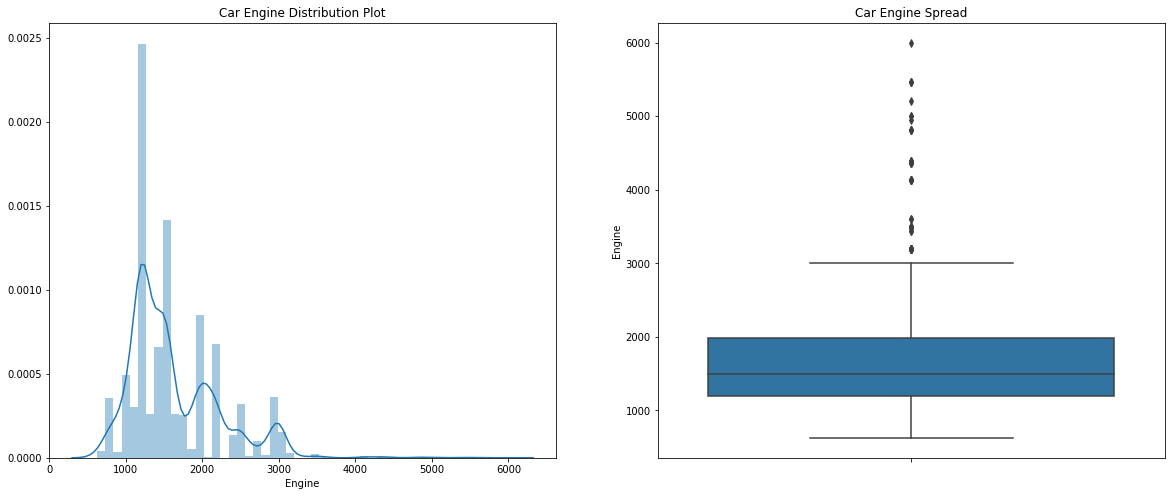

In [10]:
## 자동차 Engine 분포
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Engine Distribution Plot')
sns.distplot(df_train.Engine)

plt.subplot(1,2,2)
plt.title('Car Engine Spread')
sns.boxplot(y=df_train.Engine)

plt.show()

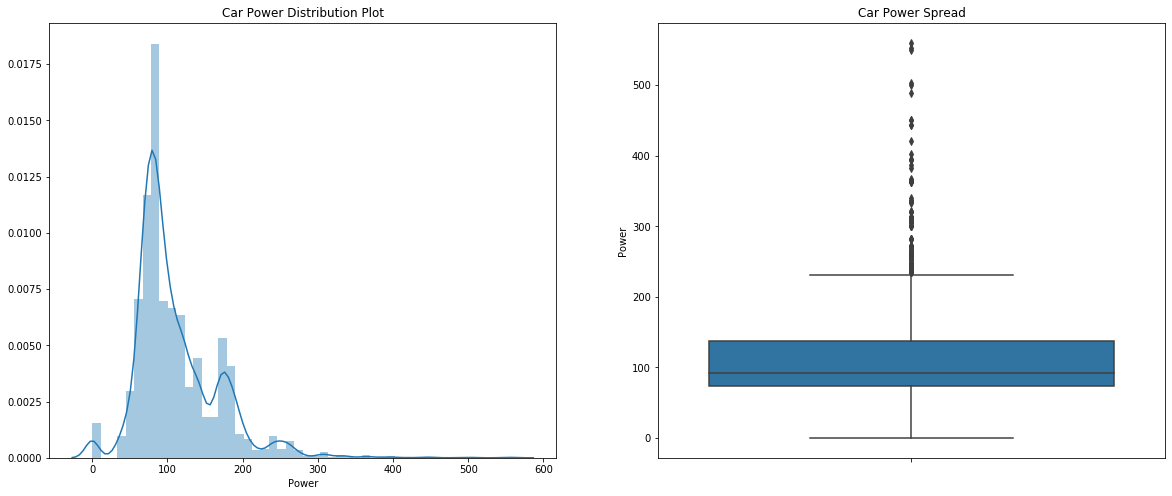

In [11]:
## 자동차 Power 분포
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Power Distribution Plot')
sns.distplot(df_train.Power)

plt.subplot(1,2,2)
plt.title('Car Power Spread')
sns.boxplot(y=df_train.Power)

plt.show()

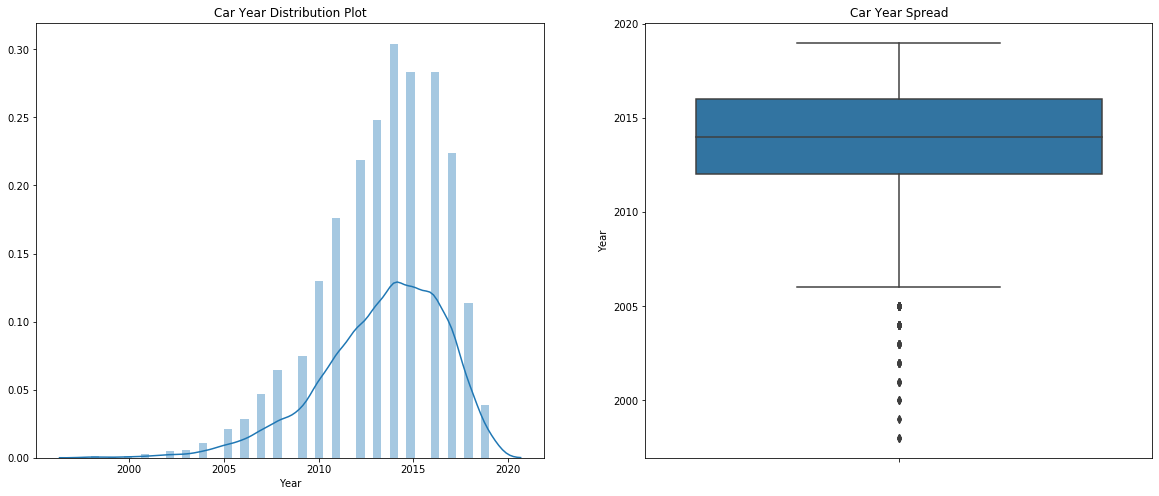

In [12]:
## 자동차 Year 분포
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Year Distribution Plot')
sns.distplot(df_train.Year)

plt.subplot(1,2,2)
plt.title('Car Year Spread')
sns.boxplot(y=df_train.Year)

plt.show()

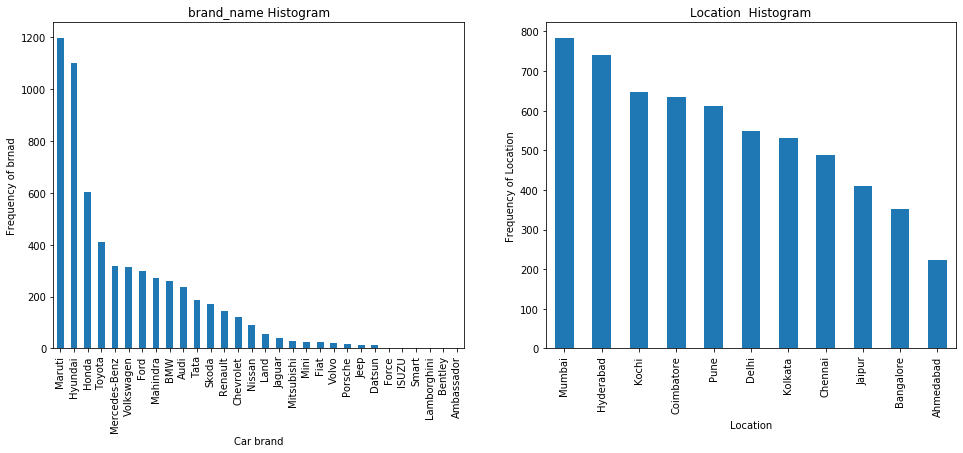

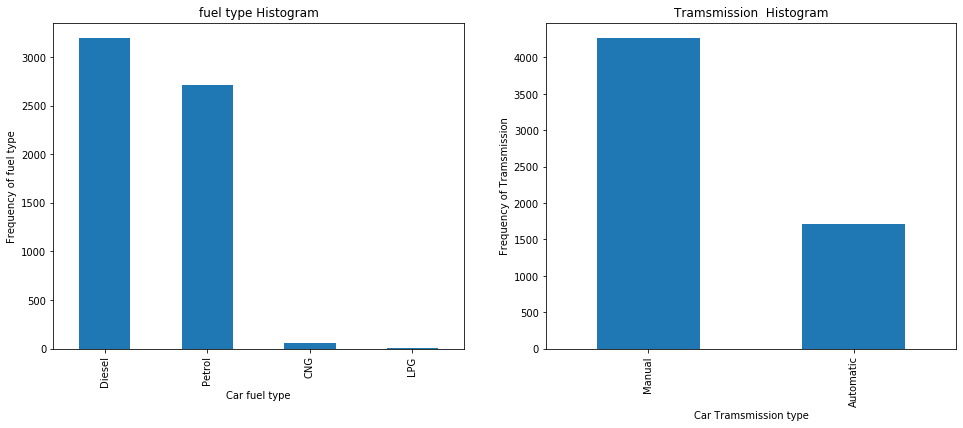

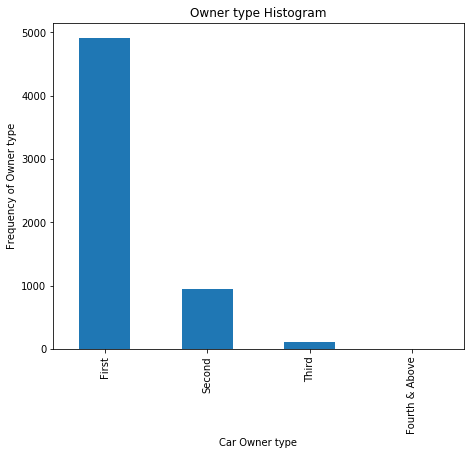

In [13]:
## brand 종류 , location 종류, fuel-종류, Trainsmission종류, owner 종류
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df_train.brand_name.value_counts().plot(kind='bar')
plt.title('brand_name Histogram')
plt1.set(xlabel = 'Car brand', ylabel='Frequency of brnad')

plt.subplot(1,3,2)
plt1 = df_train.Location.value_counts().plot(kind='bar')
plt.title('Location  Histogram')
plt1.set(xlabel = 'Location', ylabel='Frequency of Location')


plt.show()

## brand 종류 , location 종류, fuel-종류, Trainsmission종류, owner 종류
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df_train.Fuel_Type.value_counts().plot(kind='bar')
plt.title('fuel type Histogram')
plt1.set(xlabel = 'Car fuel type', ylabel='Frequency of fuel type')

plt.subplot(1,3,2)
plt1 = df_train.Transmission.value_counts().plot(kind='bar')
plt.title('Tramsmission  Histogram')
plt1.set(xlabel = 'Car Tramsmission type', ylabel='Frequency of Tramsmission')


plt.show()

## brand 종류 , location 종류, fuel-종류, Trainsmission종류, owner 종류
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df_train.Owner_Type.value_counts().plot(kind='bar')
plt.title('Owner type Histogram')
plt1.set(xlabel = 'Car Owner type', ylabel='Frequency of Owner type')


plt.show()

# 2. 종속변수와 데이터 상관관계 파악

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


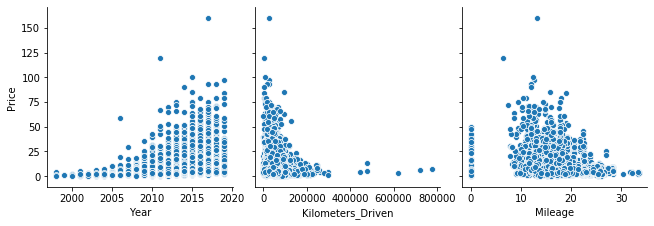

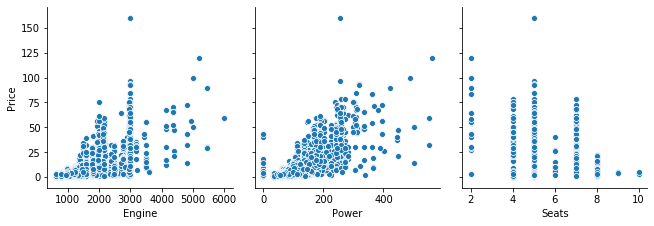

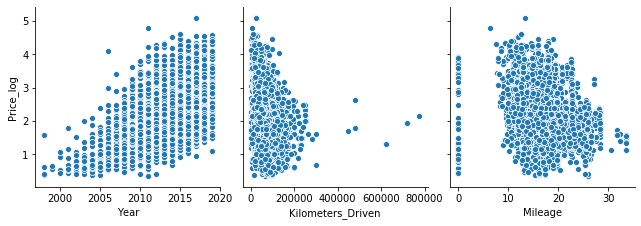

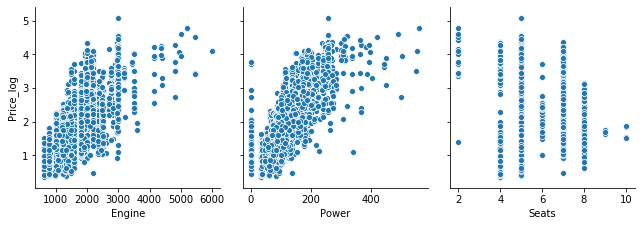

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df_train['Price_log'] = np.log1p(df_train['Price'].values)

## 상관관계 파악을 위한 
sns.pairplot(data=df_train, x_vars=["Year","Kilometers_Driven","Mileage"],y_vars='Price' ,size=3)

sns.pairplot(data=df_train, x_vars=["Engine","Power","Seats"],y_vars='Price' ,size=3)

sns.pairplot(data=df_train, x_vars=["Year","Kilometers_Driven","Mileage"],y_vars='Price_log' ,size=3)

sns.pairplot(data=df_train, x_vars=["Engine","Power","Seats"],y_vars='Price_log' ,size=3)
del df_train['Price']

In [15]:
## 상관관계파악
df_train.corr()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price_log
Year,1.000000,-0.448798,0.314547,-0.052992,0.069294,0.012005,0.472309
Kilometers_Driven,-0.448798,1.000000,-0.143095,0.154565,-0.016423,0.213149,-0.186217
Mileage,0.314547,-0.143095,1.000000,-0.598725,-0.453386,-0.311128,-0.289020
Engine,-0.052992,0.154565,-0.598725,1.000000,0.842340,0.397872,0.701066
Power,0.069294,-0.016423,-0.453386,0.842340,1.000000,0.107146,0.782610
Seats,0.012005,0.213149,-0.311128,0.397872,0.107146,1.000000,0.157186
Price_log,0.472309,-0.186217,-0.289020,0.701066,0.782610,0.157186,1.000000


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power','Seats']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


## 상관관계파악
df_train.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price_log
Year,1.000000,-0.448798,0.314547,-0.052992,0.069294,0.012005,0.472309
Kilometers_Driven,-0.448798,1.000000,-0.143095,0.154565,-0.016423,0.213149,-0.186217
Mileage,0.314547,-0.143095,1.000000,-0.598725,-0.453386,-0.311128,-0.289020
Engine,-0.052992,0.154565,-0.598725,1.000000,0.842340,0.397872,0.701066
Power,0.069294,-0.016423,-0.453386,0.842340,1.000000,0.107146,0.782610
Seats,0.012005,0.213149,-0.311128,0.397872,0.107146,1.000000,0.157186
Price_log,0.472309,-0.186217,-0.289020,0.701066,0.782610,0.157186,1.000000


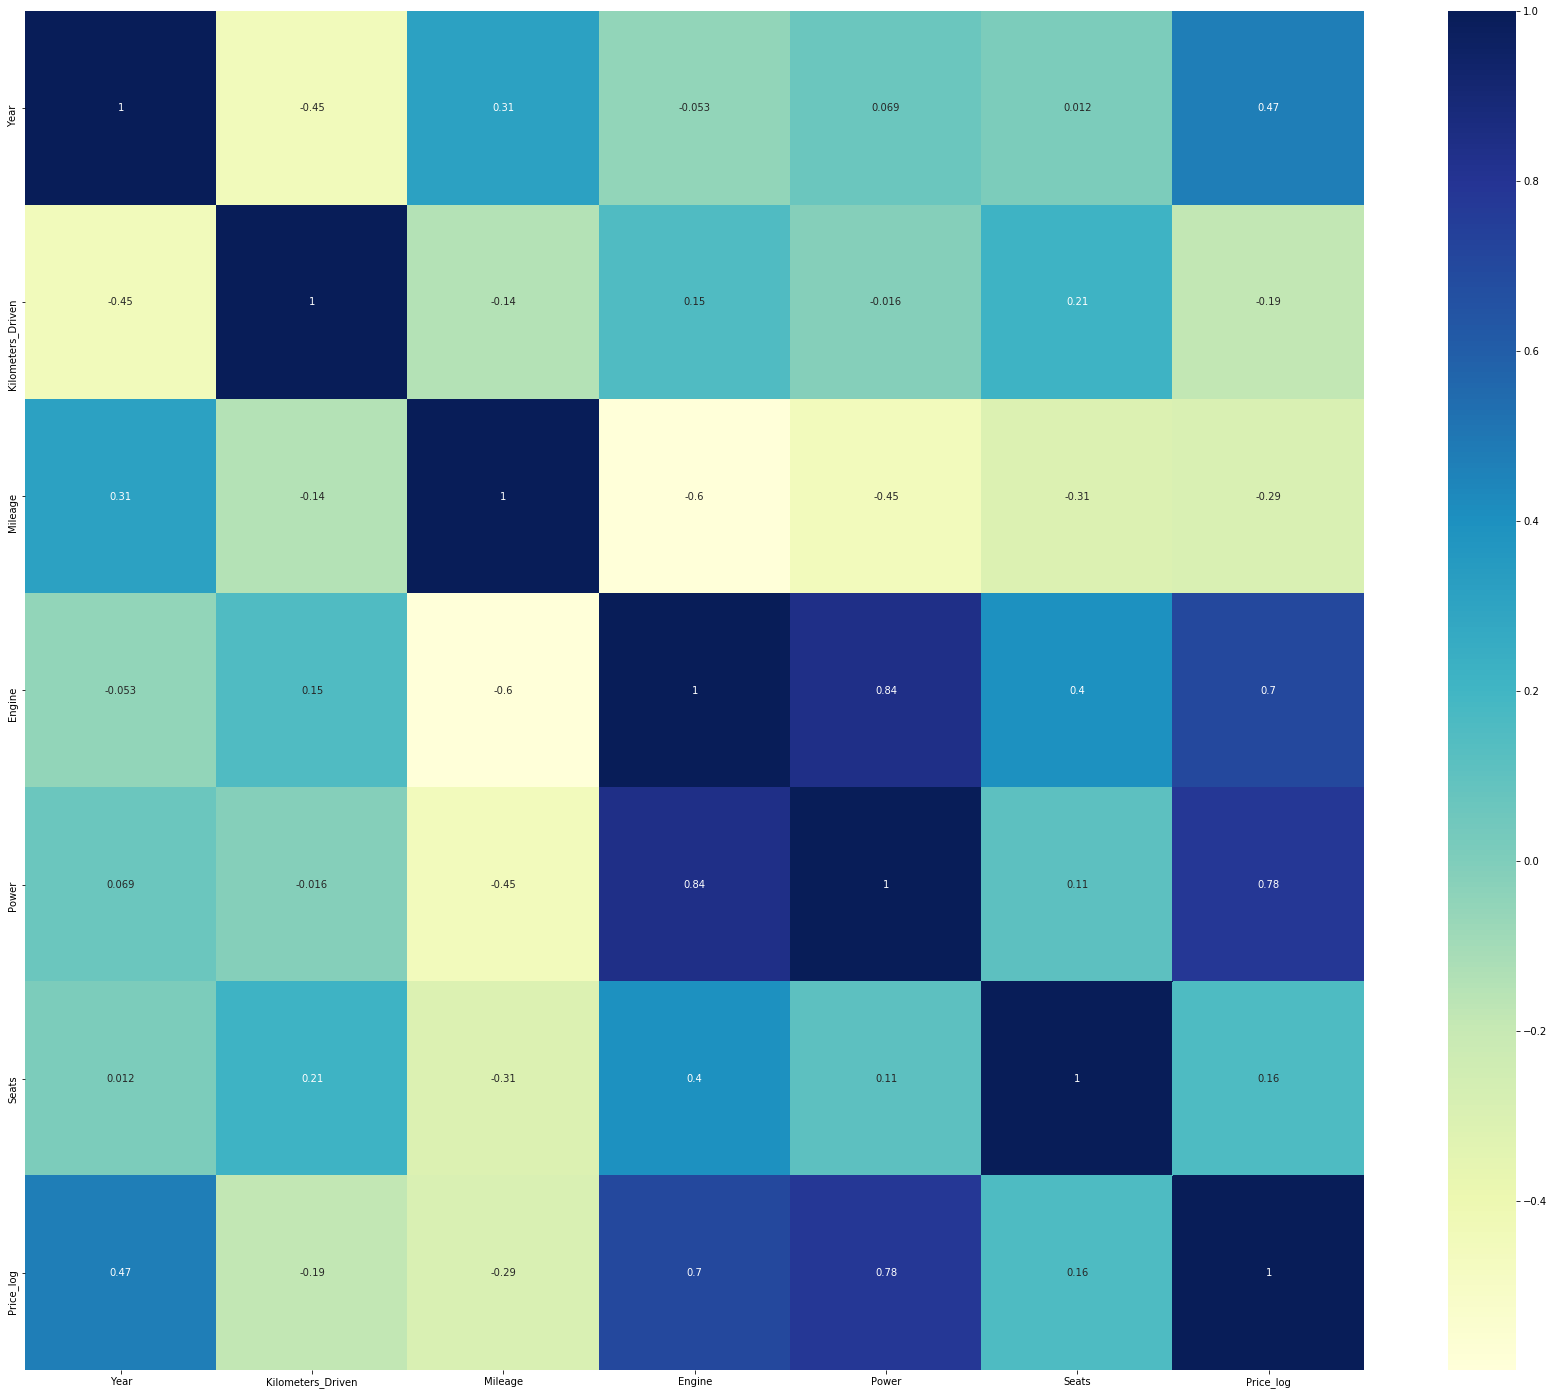

In [17]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# 3. 모델 생성

In [18]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

df_train = dummies('brand_name',df_train)
df_train = dummies('Location',df_train)
df_train = dummies('Fuel_Type',df_train)
df_train = dummies('Transmission',df_train)
df_train = dummies('Owner_Type',df_train)




In [19]:
#df_train=pd.get_dummies(df_train,prefix_sep='_')

y_train = df_train.pop('Price_log')
X_train = df_train
X_train.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force',
       'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Jaguar', 'Jeep', 'Lamborghini',
       'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi',
       'Nissan', 'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune', 'Diesel',
       'LPG', 'Petrol', 'Manual', 'Fourth & Above', 'Second', 'Third'],
      dtype='object')

## 1. Mode1 1

In [20]:
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1413.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:41   Log-Likelihood:                 1021.8
No. Observations:                5974   AIC:                            -1938.
Df Residuals:                    5921   BIC:                            -1583.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2284      0.21

In [21]:
## drop Fourth & Above
del X_train['Fourth & Above']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1441.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:41   Log-Likelihood:                 1021.8
No. Observations:                5974   AIC:                            -1940.
Df Residuals:                    5922   BIC:                            -1591.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2284      0.21

In [22]:
## drop Mahindra
del X_train['Mahindra']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1470.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:41   Log-Likelihood:                 1021.1
No. Observations:                5974   AIC:                            -1940.
Df Residuals:                    5923   BIC:                            -1599.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0114      0.05

In [23]:
## drop Fiat
del X_train['Fiat']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1500.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:41   Log-Likelihood:                 1021.0
No. Observations:                5974   AIC:                            -1942.
Df Residuals:                    5924   BIC:                            -1607.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0153      0.05

In [24]:
## drop ISUZU
del X_train['ISUZU']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1531.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:41   Log-Likelihood:                 1020.8
No. Observations:                5974   AIC:                            -1944.
Df Residuals:                    5925   BIC:                            -1616.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0166      0.05

In [25]:
## drop LPG
del X_train['LPG']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1564.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:41   Log-Likelihood:                 1020.5
No. Observations:                5974   AIC:                            -1945.
Df Residuals:                    5926   BIC:                            -1624.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0276      0.04

In [26]:
## drop Petrol
del X_train['Petrol']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1598.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:41   Log-Likelihood:                 1020.1
No. Observations:                5974   AIC:                            -1946.
Df Residuals:                    5927   BIC:                            -1632.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0520      0.03

In [27]:
## drop Chennai
del X_train['Chennai']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1633.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:41   Log-Likelihood:                 1018.7
No. Observations:                5974   AIC:                            -1945.
Df Residuals:                    5928   BIC:                            -1637.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0328      0.03

In [28]:
## drop Smart
del X_train['Smart']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1669.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:42   Log-Likelihood:                 1017.0
No. Observations:                5974   AIC:                            -1944.
Df Residuals:                    5929   BIC:                            -1643.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0231      0.03

In [29]:
## drop Force
del X_train['Force']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1707.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:42   Log-Likelihood:                 1015.2
No. Observations:                5974   AIC:                            -1942.
Df Residuals:                    5930   BIC:                            -1648.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0214      0.03

In [30]:
## drop Bentley
del X_train['Bentley']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1747.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:42   Log-Likelihood:                 1012.5
No. Observations:                5974   AIC:                            -1939.
Df Residuals:                    5931   BIC:                            -1651.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0194      0.03

In [31]:
## drop Third
del X_train['Third']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1787.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:42   Log-Likelihood:                 1009.0
No. Observations:                5974   AIC:                            -1934.
Df Residuals:                    5932   BIC:                            -1653.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0323      0.03

In [32]:
## drop Nissan
del X_train['Nissan']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1829.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:42   Log-Likelihood:                 1003.7
No. Observations:                5974   AIC:                            -1925.
Df Residuals:                    5933   BIC:                            -1651.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0037      0.03

In [33]:
## drop Renault
del X_train['Renault']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1873.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:42   Log-Likelihood:                 999.36
No. Observations:                5974   AIC:                            -1919.
Df Residuals:                    5934   BIC:                            -1651.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0292      0.03

In [34]:
## drop Ford
del X_train['Ford']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1920.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:42   Log-Likelihood:                 996.42
No. Observations:                5974   AIC:                            -1915.
Df Residuals:                    5935   BIC:                            -1654.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0504      0.03

In [35]:
## drop Volkswagen
del X_train['Volkswagen']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1970.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:42   Log-Likelihood:                 993.26
No. Observations:                5974   AIC:                            -1911.
Df Residuals:                    5936   BIC:                            -1656.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0696      0.03

In [36]:
## drop Pune
del X_train['Pune']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     2020.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:42   Log-Likelihood:                 986.03
No. Observations:                5974   AIC:                            -1898.
Df Residuals:                    5937   BIC:                            -1650.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0510      0.03

In [37]:
## drop Kochi
del X_train['Kochi']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     2076.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:42   Log-Likelihood:                 982.37
No. Observations:                5974   AIC:                            -1893.
Df Residuals:                    5938   BIC:                            -1652.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0494      0.03

In [38]:
## drop Jaipur
del X_train['Jaipur']
# Fit X to y
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     2135.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:42   Log-Likelihood:                 979.18
No. Observations:                5974   AIC:                            -1888.
Df Residuals:                    5939   BIC:                            -1654.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0434      0.03

In [39]:
## drop Mumbai
del X_train['Mumbai']
# Fit X to y
print(X_train.columns)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Audi', 'BMW', 'Chevrolet', 'Datsun', 'Honda', 'Hyundai',
       'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Maruti', 'Mercedes-Benz',
       'Mini', 'Mitsubishi', 'Porsche', 'Skoda', 'Tata', 'Toyota', 'Volvo',
       'Bangalore', 'Coimbatore', 'Delhi', 'Hyderabad', 'Kolkata', 'Diesel',
       'Manual', 'Second'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     2196.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:42   Log-Likelihood:                 974.69
No. Observations:                5974   AIC:                            -1881.
Df Residuals:       

In [40]:
## drop Seats
del X_train['Seats']
# Fit X to y
print(X_train.columns)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Audi', 'BMW', 'Chevrolet', 'Datsun', 'Honda', 'Hyundai', 'Jaguar',
       'Jeep', 'Lamborghini', 'Land', 'Maruti', 'Mercedes-Benz', 'Mini',
       'Mitsubishi', 'Porsche', 'Skoda', 'Tata', 'Toyota', 'Volvo',
       'Bangalore', 'Coimbatore', 'Delhi', 'Hyderabad', 'Kolkata', 'Diesel',
       'Manual', 'Second'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     2262.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:37:42   Log-Likelihood:                 971.40
No. Observations:                5974   AIC:                            -1877.
Df Residuals:                

In [41]:
#모델 객체 생성
m_reg = LinearRegression(fit_intercept = True) #fit_intercept -> beta0 생성 여부

#모델 학습
m_reg.fit(X_train, y_train) 
m_reg.intercept_,m_reg.coef_

(0.06892659102586496,
 array([-1.92594806e-17,  2.06709452e+00, -7.06281388e-01, -5.49321609e-01,
         1.09416069e+00,  1.87772039e+00,  6.46081823e-01,  6.23261370e-01,
        -1.82101053e-01, -2.83636415e-01,  9.02846935e-02,  6.78340495e-02,
         7.16904504e-01,  3.24105689e-01,  7.90121420e-01,  8.55745436e-01,
         8.41339627e-02,  6.53750784e-01,  1.03642249e+00,  2.40967117e-01,
         7.21740488e-01,  1.07021780e-01, -2.85270701e-01,  2.70404175e-01,
         4.79832132e-01,  1.43815752e-01,  1.03780006e-01, -4.25190261e-02,
         1.12846374e-01, -1.66982409e-01,  2.32559759e-01, -1.07732275e-01,
        -5.51748321e-02]))

In [42]:
y_pred = m_reg.predict(X_train)
print(np.round(list(y_pred),3)) # 27개
print(np.round(m_reg.score(X_train, y_train),3))
# 선형 모델의 절편값 β0 # 추정된 상수항
beta0 = m_reg.intercept_

# 선형 모델의 기울기값 β1 # 추정된 가중치 벡터
beta1 = m_reg.coef_
print('y = {} + {} x1 + {} x2 + {} x3 + {} x4 + {} x5+ {} x6 + {} x7 + {} x8 + {} x9 + {} x10+ {} x11 + {} x12 + {} x13 + {} x14 + {} x15+ {} x16 + {} x17 + {} x18 + {} x19 + {} x20+ {} x21 + {} x22 + {} x23 + {} x24 + {} x25+ {} x26 + {} x27 + {} x28 + {} x29 + {} x30+ {} x31 + {} x32  '.format(round(beta0,3),\
                                                              round(beta1[0],3), round(beta1[1],3),round(beta1[2],3), round(beta1[3],3), round(beta1[4],3),\
                                                             round(beta1[5],3), round(beta1[6],3),round(beta1[7],3), round(beta1[8],3), round(beta1[9],3),\
                                                             round(beta1[10],3), round(beta1[11],3),round(beta1[12],3), round(beta1[13],3), round(beta1[14],3),\
                                                             round(beta1[15],3), round(beta1[16],3),round(beta1[17],3), round(beta1[18],3), round(beta1[19],3),\
                                                             round(beta1[20],3), round(beta1[21],3),round(beta1[22],3), round(beta1[23],3), round(beta1[24],3),\
                                                             round(beta1[25],3), round(beta1[26],3),round(beta1[27],3), round(beta1[28],3), round(beta1[29],3),\
                                                             round(beta1[30],3), round(beta1[31],3),round(beta1[32],3) ))

[1.05  2.194 1.406 ... 1.994 1.305 1.201]
0.924
y = 0.069 + -0.0 x1 + 2.067 x2 + -0.706 x3 + -0.549 x4 + 1.094 x5+ 1.878 x6 + 0.646 x7 + 0.623 x8 + -0.182 x9 + -0.284 x10+ 0.09 x11 + 0.068 x12 + 0.717 x13 + 0.324 x14 + 0.79 x15+ 0.856 x16 + 0.084 x17 + 0.654 x18 + 1.036 x19 + 0.241 x20+ 0.722 x21 + 0.107 x22 + -0.285 x23 + 0.27 x24 + 0.48 x25+ 0.144 x26 + 0.104 x27 + -0.043 x28 + 0.113 x29 + -0.167 x30+ 0.233 x31 + -0.108 x32  


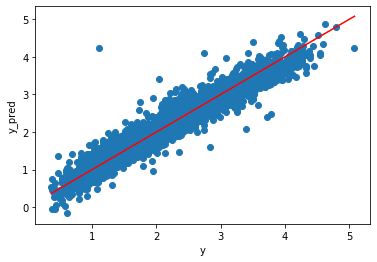

In [43]:
import matplotlib.pyplot as plt
# 실측치y와 예측치y의 관계성 #
plt.scatter(y_train, y_pred)
line = np.linspace(min(y_train.values), max(y_train.values), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()

In [44]:
# Sum of Square Error
SSE = sum((y_train-y_pred)**2)
# Sum of Square Regression
SSR = sum((y_pred-np.mean(y_train))**2)
SST = SSE + SSR
SSE,SSR,SST

(252.6707348495187, 3078.8978394830524, 3331.568574332571)

In [45]:
n,p = X_train.shape
print("n,p:",n,p)
# mean square error / 회귀로 예측해도 좁힐 수 없는 관측값과의 차이가 얼마나 있는지 말해주는 수치
MSE=SSE/(n-p-1)
# regression mean square:평균으로 말하는 것과 회귀로 예측해서 말하는 것의 차이가 얼마나 있는지를 말해주는 수치
MSR=SSR/p
print("MSE,MSR:",MSE,MSR)
# f분포 하에서 관찰한 값이 얼마나 이상한지 아닌지, 보기힘든건지 아닌지 판단
# 즉 모형의 적합성을 판단하기 위해 f의 수치를 확인
# 공식: 독립변수(X)로 의해 설명된 variation(MSR) / 독립변수(X)로 의해 설명되지 못한 variation(MSE) 
f=MSR/MSE
print("f:",f)

n,p: 5974 33
MSE,MSR: 0.04253716074907722 93.29993452978947
f: 2193.3747548445267


In [46]:
# 수치해석기능을 제공하는 파이썬 패키지
# stats 서브패키지는 확률분포 분석을 위한 다양한 기능을 제공
from scipy import stats
# pvalue로 기각할지 선정 
# cdf(cumulative distribution function: 누적분포함수)
# 회귀분석은 F-통계량에 대한 우측검정으로 가설을 검정
pvalue = 1-stats.f.cdf(f,p,n-p-1) # f값이 x임 # df은 분자, 분모 순서대로 넣기 -> "pvalue"
print("pvalue:",pvalue)

pvalue: 1.1102230246251565e-16


In [72]:
y_train.to_numpy(), y_pred

(array([1.01160091, 2.60268969, 1.70474809, ..., 1.36097655, 1.29472717,
        1.25276297]),
 array([1.04966789, 2.19378516, 1.40574189, ..., 1.99446588, 1.30465973,
        1.20144523]))

In [78]:
#일표본 t-검정
from scipy import stats
#Revenue = y_train.Price_log.Revenue #Revenue 변수 생성 

result = stats.ttest_1samp(y_train.to_numpy().reshape(-1,1), y_pred.reshape(-1,1)) 
print('t statistic : %.3f \np-value : %.3f' % (result)) #result변수의 결과값을 소수점 셋째자리까지 표시

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
#Calculating the Variance Inflation Factor
checkVIF(X_train)

## 2. model 2

In [ ]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
X_train.columns[rfe.support_]

In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

In [ ]:
X_train_new = build_model(X_train_rfe,y_train)

In [ ]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

In [ ]:
lm.intercept_, lm.coef_